# Statistic Creation

This notebook is used to create the statistics based on the collected users file.

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_users = os.path.join("users_edited.json")
attributes = ["Reputation", "votes", "avotes", "qvotes", "count_of_answers", "count_of_questions"]

In [19]:
f = open(path_users, 'r')
users_dict = json.load(f)
users = []
for key, val in users_dict.items():
    users.append(val)

In [65]:
def create_histogram(list_, attribute, bins=5):
    print (attribute)
    attributes = [ np.log(int(elem[attribute])) for elem in list_]
    plt.hist(attributes, bins=bins)
    plt.yscale('log')
    plt.xticks()
    plt.show()
    return np.histogram(attributes)

Reputation


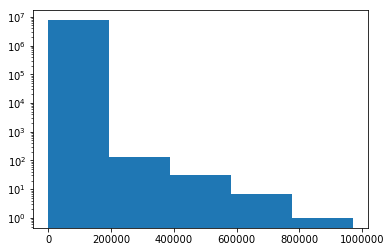

[7617016     135      32       7       1] [  1.00000000e+00   1.93878000e+05   3.87755000e+05   5.81632000e+05
   7.75509000e+05   9.69386000e+05]
votes


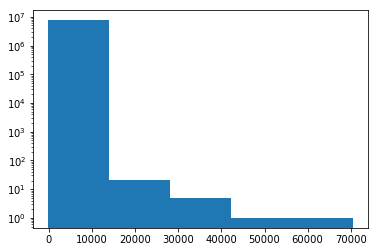

[7617163      21       5       1       1] [  -154.   13962.2  28078.4  42194.6  56310.8  70427. ]
avotes


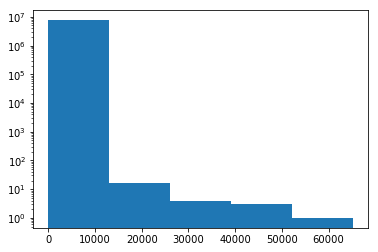

[7617167      16       4       3       1] [ -3.00000000e+01   1.30096000e+04   2.60492000e+04   3.90888000e+04
   5.21284000e+04   6.51680000e+04]
qvotes


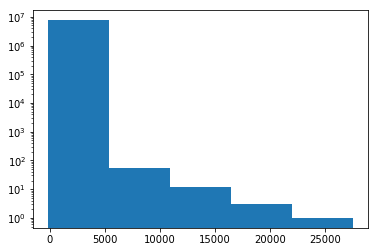

[7617121      54      12       3       1] [  -154.    5383.8  10921.6  16459.4  21997.2  27535. ]
count_of_answers


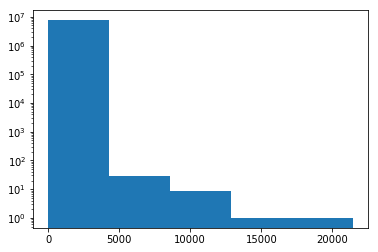

[7617152      28       9       1       1] [     0.    4285.6   8571.2  12856.8  17142.4  21428. ]
count_of_questions


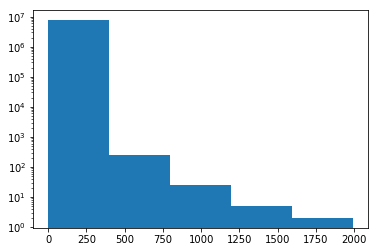

[7616913     247      24       5       2] [    0.    398.2   796.4  1194.6  1592.8  1991. ]


In [21]:
# create histograms    
for attr in attributes:
    numbers, bins = create_histogram(users, attr)
    print (numbers, bins)
    dict_hist = {}
    dict_hist["numbers"] = numbers.tolist()
    dict_hist["bins"] = bins.tolist()

    with open( attr + "_hist.json", 'w') as r:
        json.dump(dict_hist, r)

In [67]:
def create_ordered_scatter(list_, attribute):
    print (attribute)
    attributes = [ int(elem[attribute]) for elem in list_ if not int(elem[attribute]) == 1]
    attributes = sorted(attributes)
    plt.plot(attributes)
    plt.yscale('log')
    plt.show()

Reputation


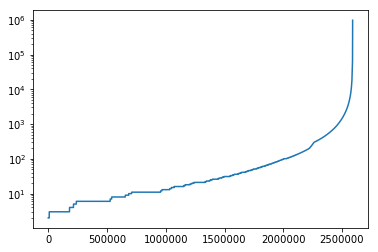

Reputation


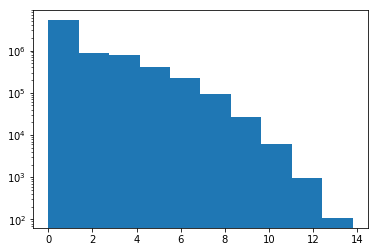

[5207129  891061  772370  400569  220242   91476   27103    6159     973
     109]
[  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.30000000e+01
   2.48000000e+02   9.85000000e+02   3.90700000e+03   1.55080000e+04
   6.15460000e+04   2.44257000e+05   9.69386000e+05]


In [70]:
# create scatters
for attr in ["Reputation"]:
    create_ordered_scatter(users, attr)
    hist = (create_histogram(users, attr, bins=None))
    print (hist[0])
    print (np.rint(np.exp(hist[1])))

In [ ]:
# TODO adapt classes (logarithmic reputation?)